In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset = pd.read_csv('price_train.csv')
dataset_1=pd.read_csv('price_test.csv')
# dataset=dataset.drop(['host_is_superhost','id','X1','host_response_rate','host_listings_count','host_response_time','host_identity_verified','latitude','longitude','cancellation_policy'],axis=1)
# dataset_1=dataset_1.drop(['host_is_superhost','id','X1','host_response_rate','host_listings_count','host_response_time','host_identity_verified','latitude','longitude','cancellation_policy'],axis=1)
# data
# X = dataset.iloc[:, 1:-1].values
# y = dataset.iloc[:, -1].values

In [3]:
dataset.head()

,X1,id,host_is_superhost,host_response_rate,host_response_time,host_listings_count,host_identity_verified,accommodates,neighbourhood_group_cleansed,property_type,room_type,latitude,longitude,guests_included,bathrooms,bedrooms,beds,bed_type,amenities,cleaning_fee,minimum_nights,maximum_nights,instant_bookable,cancellation_policy,price
0,5460,22146017,False,99%,within an hour,521,False,5,Downtown,Apartment,Entire home/apt,47.612163,-122.338239,4,2.0,2,2,Real Bed,"{TV,Internet,Wifi,Kitchen,Elevator,Heating,""Fa...",$129.00,2,1125,True,strict,$279.00
1,4143,18638163,True,100%,within an hour,1,True,2,Queen Anne,House,Entire home/apt,47.640827,-122.355248,1,1.0,0,1,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",$50.00,2,30,True,moderate,$99.00
2,5802,22734110,True,100%,within an hour,1,False,4,Rainier Valley,Guest suite,Entire home/apt,47.549007,-122.273951,2,1.0,1,2,Real Bed,"{TV,Wifi,""Air conditioning"",Kitchen,""Free stre...",$25.00,2,28,False,moderate,$75.00
3,776,3946674,True,90%,within a few hours,1,True,2,Central Area,House,Private room,47.601922,-122.307979,1,1.0,1,1,Real Bed,"{Internet,Wifi,Kitchen,""Pets live on this prop...",$0.00,2,30,False,flexible,$70.00
4,6064,23610186,True,100%,within an hour,4,True,8,Beacon Hill,House,Entire home/apt,47.552311,-122.293409,6,2.5,3,3,Real Bed,"{TV,Wifi,Kitchen,""Free parking on premises"",""S...",$99.00,2,12,False,flexible,$242.00


In [4]:
dataset_1.head()

,X1,id,host_is_superhost,host_response_rate,host_response_time,host_listings_count,host_identity_verified,accommodates,neighbourhood_group_cleansed,property_type,room_type,latitude,longitude,guests_included,bathrooms,bedrooms,beds,bed_type,amenities,cleaning_fee,minimum_nights,maximum_nights,instant_bookable,cancellation_policy
0,130,392779,False,90%,within an hour,1,True,4,Beacon Hill,Guest suite,Entire home/apt,47.575769,-122.316362,2,1.0,2,2,Real Bed,"{TV,Internet,Wifi,Kitchen,""Free street parking...",$85.00,3,300,True,moderate
1,2425,12456183,True,86%,within a day,1,False,4,Lake City,Guest suite,Entire home/apt,47.711951,-122.302355,1,1.0,1,2,Real Bed,"{TV,Wifi,""Free parking on premises"",""Pets allo...",$40.00,2,1125,True,moderate
2,432,1851863,True,100%,within an hour,1,True,2,Northgate,Apartment,Entire home/apt,47.697103,-122.344556,1,1.0,1,1,Real Bed,"{Wifi,Kitchen,""Free parking on premises"",Heati...",$150.00,5,120,False,strict_14_with_grace_period
3,5994,23309878,True,100%,within an hour,2,True,2,Downtown,Apartment,Entire home/apt,47.612364,-122.349425,1,1.0,1,1,Real Bed,"{TV,Wifi,""Air conditioning"",Kitchen,""Paid park...",$75.00,1,30,False,strict_14_with_grace_period
4,2110,10768347,False,100%,within an hour,1,False,2,Other neighborhoods,House,Private room,47.687264,-122.313444,1,1.0,1,1,Real Bed,"{TV,Internet,Wifi,""Air conditioning"",Kitchen,""...",0,1,3,False,flexible


dropping the unnneccary features

In [5]:
dataset=dataset.drop(['host_is_superhost','id','X1','host_response_rate','host_listings_count','host_response_time','host_identity_verified','latitude','longitude','cancellation_policy'],axis=1)
dataset_1=dataset_1.drop(['host_is_superhost','id','X1','host_response_rate','host_listings_count','host_response_time','host_identity_verified','latitude','longitude','cancellation_policy'],axis=1)

In [6]:
dataset.head()

,accommodates,neighbourhood_group_cleansed,property_type,room_type,guests_included,bathrooms,bedrooms,beds,bed_type,amenities,cleaning_fee,minimum_nights,maximum_nights,instant_bookable,price
0,5,Downtown,Apartment,Entire home/apt,4,2.0,2,2,Real Bed,"{TV,Internet,Wifi,Kitchen,Elevator,Heating,""Fa...",$129.00,2,1125,True,$279.00
1,2,Queen Anne,House,Entire home/apt,1,1.0,0,1,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",$50.00,2,30,True,$99.00
2,4,Rainier Valley,Guest suite,Entire home/apt,2,1.0,1,2,Real Bed,"{TV,Wifi,""Air conditioning"",Kitchen,""Free stre...",$25.00,2,28,False,$75.00
3,2,Central Area,House,Private room,1,1.0,1,1,Real Bed,"{Internet,Wifi,Kitchen,""Pets live on this prop...",$0.00,2,30,False,$70.00
4,8,Beacon Hill,House,Entire home/apt,6,2.5,3,3,Real Bed,"{TV,Wifi,Kitchen,""Free parking on premises"",""S...",$99.00,2,12,False,$242.00


In [7]:
dataset_1.head()

,accommodates,neighbourhood_group_cleansed,property_type,room_type,guests_included,bathrooms,bedrooms,beds,bed_type,amenities,cleaning_fee,minimum_nights,maximum_nights,instant_bookable
0,4,Beacon Hill,Guest suite,Entire home/apt,2,1.0,2,2,Real Bed,"{TV,Internet,Wifi,Kitchen,""Free street parking...",$85.00,3,300,True
1,4,Lake City,Guest suite,Entire home/apt,1,1.0,1,2,Real Bed,"{TV,Wifi,""Free parking on premises"",""Pets allo...",$40.00,2,1125,True
2,2,Northgate,Apartment,Entire home/apt,1,1.0,1,1,Real Bed,"{Wifi,Kitchen,""Free parking on premises"",Heati...",$150.00,5,120,False
3,2,Downtown,Apartment,Entire home/apt,1,1.0,1,1,Real Bed,"{TV,Wifi,""Air conditioning"",Kitchen,""Paid park...",$75.00,1,30,False
4,2,Other neighborhoods,House,Private room,1,1.0,1,1,Real Bed,"{TV,Internet,Wifi,""Air conditioning"",Kitchen,""...",0,1,3,False


In [8]:
dataset_1.isnull().sum()

accommodates                    0
neighbourhood_group_cleansed    0
property_type                   0
room_type                       0
guests_included                 0
bathrooms                       0
bedrooms                        0
beds                            0
bed_type                        0
amenities                       0
cleaning_fee                    0
minimum_nights                  0
maximum_nights                  0
instant_bookable                0
dtype: int64

In [9]:
# #applying it on the testing set
# dataset_1['cleaning_fee'] = dataset_1['cleaning_fee'].str.replace('$', '')
# dataset_1['bathrooms'] = dataset_1['bathrooms'].astype(int)
# dataset_1['cleaning_fee']=dataset_1['cleaning_fee'].astype(float)
# dataset_1['cleaning_fee'] = dataset_1['cleaning_fee'].astype(int)


In [10]:
dataset['price'] = dataset['price'].str.replace('$', '')
dataset['price'] = dataset['price'].str.replace(',', '')
dataset['cleaning_fee'] = dataset['cleaning_fee'].str.replace('$', '')
dataset['bathrooms'] = dataset['bathrooms'].astype(int)
dataset['price']=dataset['price'].astype(float)
dataset['cleaning_fee']=dataset['cleaning_fee'].astype(float)
dataset['cleaning_fee'] = dataset['cleaning_fee'].astype(int)

In [11]:
dataset.head()

,accommodates,neighbourhood_group_cleansed,property_type,room_type,guests_included,bathrooms,bedrooms,beds,bed_type,amenities,cleaning_fee,minimum_nights,maximum_nights,instant_bookable,price
0,5,Downtown,Apartment,Entire home/apt,4,2,2,2,Real Bed,"{TV,Internet,Wifi,Kitchen,Elevator,Heating,""Fa...",129,2,1125,True,279.0
1,2,Queen Anne,House,Entire home/apt,1,1,0,1,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",50,2,30,True,99.0
2,4,Rainier Valley,Guest suite,Entire home/apt,2,1,1,2,Real Bed,"{TV,Wifi,""Air conditioning"",Kitchen,""Free stre...",25,2,28,False,75.0
3,2,Central Area,House,Private room,1,1,1,1,Real Bed,"{Internet,Wifi,Kitchen,""Pets live on this prop...",0,2,30,False,70.0
4,8,Beacon Hill,House,Entire home/apt,6,2,3,3,Real Bed,"{TV,Wifi,Kitchen,""Free parking on premises"",""S...",99,2,12,False,242.0


#performing the label encoding

(array([-250.,    0.,  250.,  500.,  750., 1000., 1250., 1500., 1750.]),
 <a list of 9 Text major ticklabel objects>)

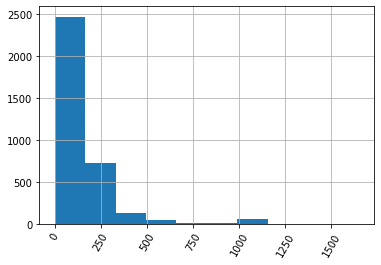

In [12]:
## See the distribution of price
import seaborn as sns
hist_price=dataset["price"].hist()

plt.xticks(rotation=60)
#we can observe that the price seems to be <500 for so many obeservations

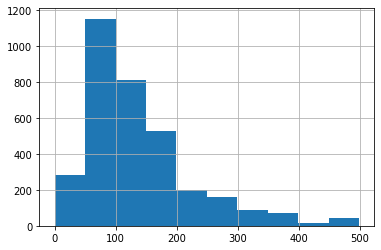

In [13]:
hist_price2=dataset["price"][dataset["price"]<500].hist()

In [14]:
dataset['neighbourhood_group_cleansed'].value_counts()

Downtown               652
Other neighborhoods    631
Capitol Hill           393
Central Area           292
Queen Anne             241
Ballard                190
West Seattle           182
Rainier Valley         156
Cascade                144
Beacon Hill            141
University District     98
Delridge                95
Northgate               81
Magnolia                68
Lake City               55
Seward Park             38
Interbay                 9
Name: neighbourhood_group_cleansed, dtype: int64

In [15]:
nh_price=dataset.groupby("neighbourhood_group_cleansed")["price"].mean()
nh_price

neighbourhood_group_cleansed
Ballard                149.215789
Beacon Hill            108.546099
Capitol Hill           145.865140
Cascade                172.513889
Central Area           137.582192
Delridge                87.936842
Downtown               244.476994
Interbay               127.222222
Lake City              116.236364
Magnolia               176.720588
Northgate              105.049383
Other neighborhoods    122.118859
Queen Anne             203.261411
Rainier Valley         127.737179
Seward Park            171.815789
University District    109.724490
West Seattle           143.752747
Name: price, dtype: float64

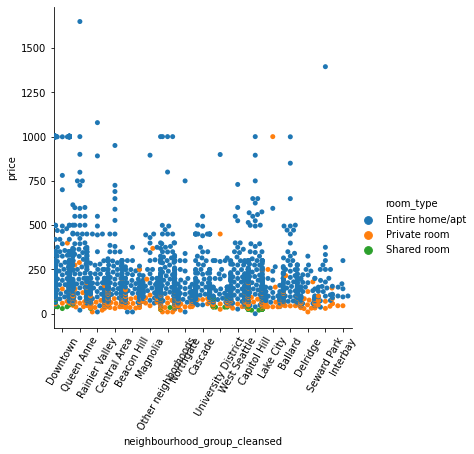

In [16]:
### Lets see the distributuion of price and neighbourhood group cleansed.
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
plott=sns.catplot(x="neighbourhood_group_cleansed",y="price",hue="room_type", kind="swarm", data=dataset)
plt.xticks(rotation=60)
plott
#we can observe that in the region of downtown there are more entire home or aparment taken

In [17]:
#Lets look at room_type variable
dataset['room_type'].value_counts()
#large number of apartments observed

Entire home/apt    2648
Private room        740
Shared room          78
Name: room_type, dtype: int64

In [18]:
# Average price per room_type
rt_price = dataset.groupby("room_type")["price"].mean()
rt_price

room_type
Entire home/apt    186.952039
Private room        71.320270
Shared room         43.628205
Name: price, dtype: float64

In [19]:
# Average price depending on the number of guests
gt_price= dataset.groupby("guests_included")["price"].mean()
gt_price

guests_included
1     132.585436
2     132.719807
3     149.685393
4     229.766355
5     242.942857
6     314.944444
7     336.785714
8     402.146341
9     369.800000
10    460.375000
11    375.000000
12    385.777778
13    495.000000
14    517.800000
15    950.000000
16    727.250000
Name: price, dtype: float64

In [20]:
# average price based on the property type
pt_price=dataset.groupby("property_type")["price"].mean()
pt_price=pt_price.sort_values(ascending=False)
pt_price

property_type
Boutique hotel        399.000000
Villa                 298.000000
Apartment             189.036269
Boat                  188.444444
Serviced apartment    170.528090
Loft                  161.041667
Cottage               159.611111
Condominium           157.051813
House                 156.468953
Houseboat             154.428571
Townhouse             147.856164
Cabin                 144.250000
Other                 131.857143
Bungalow              131.600000
Camper/RV             121.444444
Resort                109.000000
Guesthouse            106.761905
Guest suite           106.271137
Tiny house            105.416667
Yurt                  100.000000
Bed and breakfast      96.500000
In-law                 75.000000
Tent                   63.000000
Aparthotel             59.000000
Hostel                 49.500000
Farm stay              35.000000
Name: price, dtype: float64

Index(['accommodates', 'neighbourhood_group_cleansed', 'property_type',
       'room_type', 'guests_included', 'bathrooms', 'bedrooms', 'beds',
       'bed_type', 'amenities', 'cleaning_fee', 'minimum_nights',
       'maximum_nights', 'instant_bookable', 'price'],
      dtype='object')

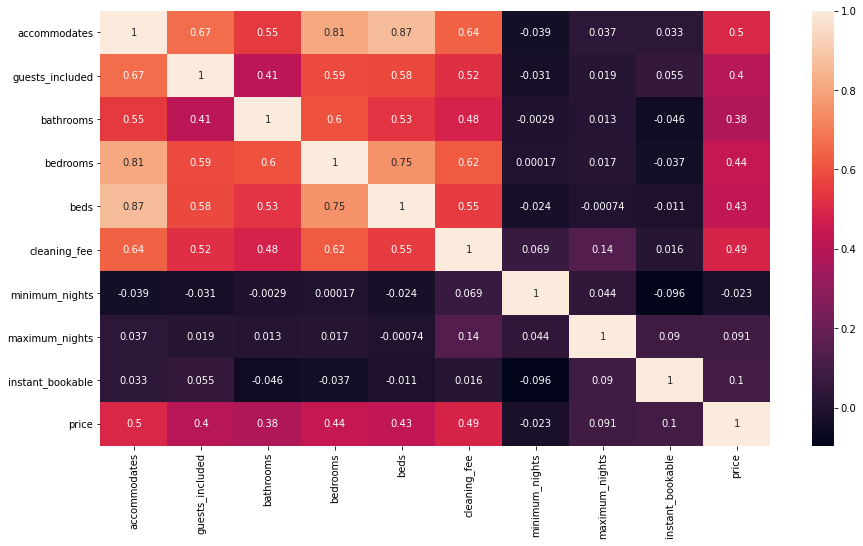

In [21]:
#Plotting correlation matrix for training set
corr = dataset.corr(method='pearson')
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True)
dataset.columns

performing the label encoding

In [22]:
#applying label encoding on training set
from sklearn.preprocessing import LabelEncoder
dataset['property_type']=LabelEncoder().fit_transform(dataset['property_type'])
dataset['instant_bookable']=LabelEncoder().fit_transform(dataset['instant_bookable'])
dataset['amenities']=LabelEncoder().fit_transform(dataset['amenities'])
dataset['bed_type']=LabelEncoder().fit_transform(dataset['bed_type'])
dataset

,accommodates,neighbourhood_group_cleansed,property_type,room_type,guests_included,bathrooms,bedrooms,beds,bed_type,amenities,cleaning_fee,minimum_nights,maximum_nights,instant_bookable,price
0,5,Downtown,1,Entire home/apt,4,2,2,2,3,1391,129,2,1125,1,279.0
1,2,Queen Anne,14,Entire home/apt,1,1,0,1,3,324,50,2,30,1,99.0
2,4,Rainier Valley,11,Entire home/apt,2,1,1,2,3,1604,25,2,28,0,75.0
3,2,Central Area,14,Private room,1,1,1,1,3,127,0,2,30,0,70.0
4,8,Beacon Hill,14,Entire home/apt,6,2,3,3,3,2076,99,2,12,0,242.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3461,5,Downtown,1,Entire home/apt,4,1,2,2,3,1138,129,2,1125,1,350.0
3462,1,Capitol Hill,14,Shared room,1,1,1,1,3,3041,15,1,21,1,30.0
3463,2,Other neighborhoods,14,Private room,1,2,1,1,3,2825,22,2,30,1,30.0
3464,2,Other neighborhoods,11,Entire home/apt,1,1,1,1,3,1766,25,1,1125,0,95.0


In [23]:
dataset_onehot_train= pd.get_dummies(dataset, columns=["neighbourhood_group_cleansed","room_type"], prefix = ["nh","rt"],drop_first=True)

In [24]:
dataset_onehot_train

,accommodates,property_type,guests_included,bathrooms,bedrooms,beds,bed_type,amenities,cleaning_fee,minimum_nights,maximum_nights,instant_bookable,price,nh_Beacon Hill,nh_Capitol Hill,nh_Cascade,nh_Central Area,nh_Delridge,nh_Downtown,nh_Interbay,nh_Lake City,nh_Magnolia,nh_Northgate,nh_Other neighborhoods,nh_Queen Anne,nh_Rainier Valley,nh_Seward Park,nh_University District,nh_West Seattle,rt_Private room,rt_Shared room
0,5,1,4,2,2,2,3,1391,129,2,1125,1,279.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,2,14,1,1,0,1,3,324,50,2,30,1,99.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,4,11,2,1,1,2,3,1604,25,2,28,0,75.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,2,14,1,1,1,1,3,127,0,2,30,0,70.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,8,14,6,2,3,3,3,2076,99,2,12,0,242.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3461,5,1,4,1,2,2,3,1138,129,2,1125,1,350.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3462,1,14,1,1,1,1,3,3041,15,1,21,1,30.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3463,2,14,1,2,1,1,3,2825,22,2,30,1,30.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
3464,2,11,1,1,1,1,3,1766,25,1,1125,0,95.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [25]:
X= dataset_onehot_train.loc[:,dataset_onehot_train.columns!='price' ]
y= dataset_onehot_train['price']

In [26]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2,random_state=0)

In [27]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression(fit_intercept=True,n_jobs=5)
regressor.fit(X_train,y_train)



LinearRegression(copy_X=True, fit_intercept=True, n_jobs=5, normalize=False)

In [28]:
y_pred=regressor.predict(X_test)

In [29]:
y_pred

array([276.42866659, 311.45676876, 108.63874407, 268.03545926,
       124.22340637, 253.9193344 ,  90.89068702, 194.65729717,
       138.86633551, 240.67720346,  66.57886885, 127.53111996,
        54.98416474, 214.18908759, 198.71269477,  63.78714875,
        62.55877835, 141.21701365,  42.58406166, 140.38227266,
       126.8474652 , 183.50556896, 205.25988993, 373.65567498,
       240.67720346,  94.78314699, 314.2375731 , 115.7227108 ,
       261.17989017,  91.1702059 , 106.2166293 , 301.26657854,
       240.67720346, 158.57988235, 111.3291165 , 132.02259327,
       100.62056024, 117.69935732, 184.9173668 ,  98.33442989,
       372.36459972, 204.30354828,  46.81008238,  69.72303987,
        92.58211887, 263.83544976,  48.33871792, 129.70792258,
       167.78923987, 116.06237352, 194.32853527, 111.85762013,
        86.35453707,  92.14179892, 358.60277225,  67.60864215,
       186.32755221,  41.12283002, 200.97094216,  88.61625874,
        74.12150656, 140.51887791, 133.48887971,  63.37

In [30]:
y_pred.shape

(694,)

In [31]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score
print(regressor.score(X_train, y_train))
MSE = mean_squared_error(y_test, y_pred)
print(MSE)
rmse=MSE**(0.5)
print(rmse)

0.4145553858816372
16017.9626669689
126.5620901651395


after tuning the hyperparameters also we dont observe any change as such

Random Forest Regression

In [32]:
#fitting the data
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor()
# n_estimators=200, max_depth = 50, min_samples_split = 5,min_samples_leaf =4)
regressor.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [33]:
y_pred=regressor.predict(X_test)

In [34]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score
print(regressor.score(X_train, y_train))
MSE = mean_squared_error(y_test, y_pred)
print(MSE)
rmse=MSE**(0.5)
print(rmse)

0.9540681169363635
7223.277689133657
84.98986815576112


Now lets see the results after tuning the hyperparameters

In [35]:
#fitting the data
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=1000 ,max_depth = 50, min_samples_split = 5,min_samples_leaf =4,n_jobs=1,verbose=2)
regressor.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 1000
building tree 2 of 1000
building tree 3 of 1000
building tree 4 of 1000
building tree 5 of 1000
building tree 6 of 1000
building tree 7 of 1000
building tree 8 of 1000
building tree 9 of 1000
building tree 10 of 1000
building tree 11 of 1000
building tree 12 of 1000
building tree 13 of 1000
building tree 14 of 1000
building tree 15 of 1000
building tree 16 of 1000
building tree 17 of 1000
building tree 18 of 1000
building tree 19 of 1000
building tree 20 of 1000
building tree 21 of 1000
building tree 22 of 1000
building tree 23 of 1000
building tree 24 of 1000
building tree 25 of 1000
building tree 26 of 1000
building tree 27 of 1000
building tree 28 of 1000
building tree 29 of 1000
building tree 30 of 1000
building tree 31 of 1000
building tree 32 of 1000
building tree 33 of 1000
building tree 34 of 1000
building tree 35 of 1000
building tree 36 of 1000
building tree 37 of 1000
building tree 38 of 1000
building tree 39 of 1000
building tree 40 of 1000
building 

[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:   10.7s finished


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=50, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=4,
                      min_samples_split=5, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=1, oob_score=False,
                      random_state=None, verbose=2, warm_start=False)

In [36]:
y_pred=regressor.predict(X_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.2s finished


In [37]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score
print(regressor.score(X_train, y_train))
MSE = mean_squared_error(y_test, y_pred)
print(MSE)
rmse=MSE**(0.5)
print(rmse)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


0.8289238865170345
8142.460890478096
90.23558549972454


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.4s finished


#XG-BOOST REGRESSOR

In [38]:
from xgboost import XGBRegressor
regressor = XGBRegressor()
regressor.fit(X_train,y_train)
# #(learning_rate =0.1,
#               n_estimators=200,
#               max_depth=5,
#               min_child_weight=2,
#               gamma=0.1,
#               subsample=0.85,
#               colsample_bytree=0.8,
#               objective= 'reg:linear',random_state=42,
#               nthread=4,
#               scale_pos_weight=1,
#               seed=27,verbosity=1)

[15:27:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [39]:
y_pred=regressor.predict(X_test)

In [40]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score
print(regressor.score(X_train, y_train))
MSE = mean_squared_error(y_test, y_pred)
print(MSE)
rmse=MSE**(0.5)
print(rmse)

0.7610716334193371
8008.9490594254075
89.49273188044606


#lets try tuning the hyperparameters

In [41]:
#fitting the data
from xgboost import XGBRegressor
regressor1 = XGBRegressor(learning_rate =0.1,
              n_estimators=200,
              max_depth=5,
              min_child_weight=2,
              gamma=0.1,
              subsample=0.85,
              colsample_bytree=0.8,
              objective= 'reg:linear',random_state=42,
              nthread=4,
              scale_pos_weight=1,
              seed=27,verbosity=1)#tuning the parameters
regressor1.fit(X, y)

[15:27:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.8, gamma=0.1,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=5, min_child_weight=2, missing=None, n_estimators=200,
             n_jobs=1, nthread=4, objective='reg:linear', random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=27,
             silent=None, subsample=0.85, verbosity=1)

In [42]:
y_pred=regressor1.predict(X_test)

In [43]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score
print(regressor1.score(X_train, y_train))
MSE = mean_squared_error(y_test, y_pred)
print(MSE)
rmse=MSE**(0.5)
print(rmse)

0.9246865032262652
1467.7654555528663
38.311427218949525


#we can see change and good accuracy

In [44]:
#applying it on the testing set
dataset_1['cleaning_fee'] = dataset_1['cleaning_fee'].str.replace('$', '')
dataset_1['bathrooms'] = dataset_1['bathrooms'].astype(int)
dataset_1['cleaning_fee']=dataset_1['cleaning_fee'].astype(float)
dataset_1['cleaning_fee'] = dataset_1['cleaning_fee'].astype(int)

In [45]:
dataset_1['neighbourhood_group_cleansed'].value_counts()

Downtown               321
Other neighborhoods    305
Capitol Hill           206
Central Area           141
Queen Anne             108
West Seattle           101
Ballard                 88
Rainier Valley          86
Cascade                 83
Beacon Hill             74
Delridge                59
University District     52
Northgate               38
Magnolia                29
Lake City               27
Seward Park             15
Interbay                 1
Name: neighbourhood_group_cleansed, dtype: int64

In [46]:
#applying encoding on test data
from sklearn.preprocessing import LabelEncoder
dataset_1['property_type']=LabelEncoder().fit_transform(dataset_1['property_type'])
dataset_1['instant_bookable']=LabelEncoder().fit_transform(dataset_1['instant_bookable'])
dataset_1['amenities']=LabelEncoder().fit_transform(dataset_1['amenities'])
dataset_1['bed_type']=LabelEncoder().fit_transform(dataset_1['bed_type'])
dataset_1

,accommodates,neighbourhood_group_cleansed,property_type,room_type,guests_included,bathrooms,bedrooms,beds,bed_type,amenities,cleaning_fee,minimum_nights,maximum_nights,instant_bookable
0,4,Beacon Hill,9,Entire home/apt,2,1,2,2,4,689,85,3,300,1
1,4,Lake City,9,Entire home/apt,1,1,1,2,4,936,40,2,1125,1
2,2,Northgate,1,Entire home/apt,1,1,1,1,4,1460,150,5,120,0
3,2,Downtown,1,Entire home/apt,1,1,1,1,4,883,75,1,30,0
4,2,Other neighborhoods,11,Private room,1,1,1,1,4,569,0,1,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1729,3,University District,1,Entire home/apt,1,1,1,1,4,1044,60,2,1125,0
1730,4,West Seattle,1,Entire home/apt,1,1,2,2,4,191,50,2,29,1
1731,2,Other neighborhoods,11,Private room,1,1,1,1,4,616,25,1,29,0
1732,4,Central Area,9,Entire home/apt,2,1,1,2,4,1434,75,3,1125,1


Index(['accommodates', 'neighbourhood_group_cleansed', 'property_type',
       'room_type', 'guests_included', 'bathrooms', 'bedrooms', 'beds',
       'bed_type', 'amenities', 'cleaning_fee', 'minimum_nights',
       'maximum_nights', 'instant_bookable'],
      dtype='object')

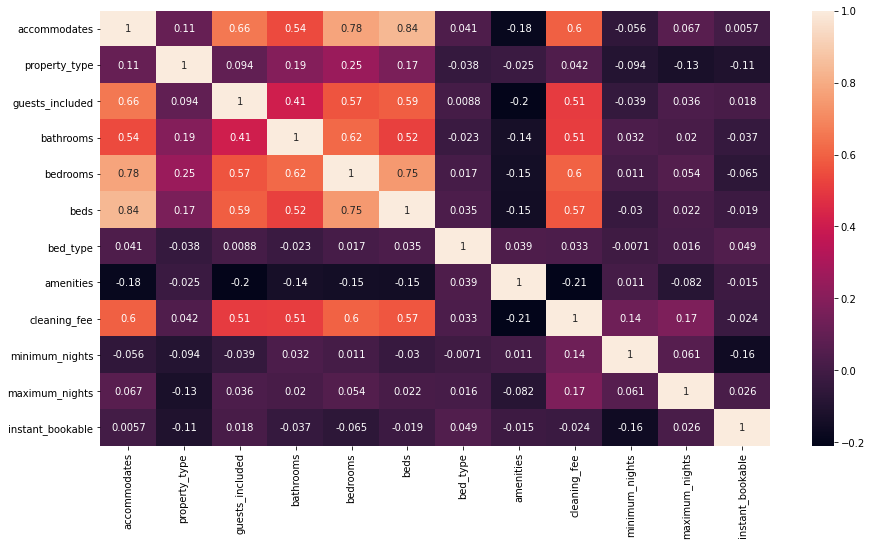

In [47]:
#Plotting correlation matrix on the test set
import seaborn as sns
corr = dataset_1.corr(method='pearson')
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True)
dataset_1.columns

performing the one hot encoding

In [48]:
dataset_onehot_test = pd.get_dummies(dataset_1, columns=["neighbourhood_group_cleansed","room_type"], prefix = ["nh","rt"],drop_first=True)

In [49]:
dataset_onehot_test

,accommodates,property_type,guests_included,bathrooms,bedrooms,beds,bed_type,amenities,cleaning_fee,minimum_nights,maximum_nights,instant_bookable,nh_Beacon Hill,nh_Capitol Hill,nh_Cascade,nh_Central Area,nh_Delridge,nh_Downtown,nh_Interbay,nh_Lake City,nh_Magnolia,nh_Northgate,nh_Other neighborhoods,nh_Queen Anne,nh_Rainier Valley,nh_Seward Park,nh_University District,nh_West Seattle,rt_Private room,rt_Shared room
0,4,9,2,1,2,2,4,689,85,3,300,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,4,9,1,1,1,2,4,936,40,2,1125,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,2,1,1,1,1,1,4,1460,150,5,120,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,2,1,1,1,1,1,4,883,75,1,30,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,2,11,1,1,1,1,4,569,0,1,3,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1729,3,1,1,1,1,1,4,1044,60,2,1125,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1730,4,1,1,1,2,2,4,191,50,2,29,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1731,2,11,1,1,1,1,4,616,25,1,29,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
1732,4,9,2,1,1,2,4,1434,75,3,1125,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [50]:
X_t=dataset_onehot_test.loc[:,:]

In [51]:
y_pred_test=regressor1.predict(X_t)

In [52]:
y_pred_test.shape

(1734,)

In [55]:
y_pred_train=regressor1.predict(X)

In [56]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score
print(regressor1.score(X, y))
MSE = mean_squared_error(y, y_pred_train)
print(MSE)
rmse=MSE**(0.5)
print(rmse)

0.9282147209192908
1808.255392703409
42.52358631046315


Adding the y_pred column to the test dataset

In [58]:
y_pred=y_pred_test.astype(str)
dataset_1['price']=y_pred
dataset_1

,accommodates,neighbourhood_group_cleansed,property_type,room_type,guests_included,bathrooms,bedrooms,beds,bed_type,amenities,cleaning_fee,minimum_nights,maximum_nights,instant_bookable,price
0,4,Beacon Hill,9,Entire home/apt,2,1,2,2,4,689,85,3,300,1,134.43756
1,4,Lake City,9,Entire home/apt,1,1,1,2,4,936,40,2,1125,1,136.21184
2,2,Northgate,1,Entire home/apt,1,1,1,1,4,1460,150,5,120,0,137.40517
3,2,Downtown,1,Entire home/apt,1,1,1,1,4,883,75,1,30,0,151.4277
4,2,Other neighborhoods,11,Private room,1,1,1,1,4,569,0,1,3,0,62.1034
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1729,3,University District,1,Entire home/apt,1,1,1,1,4,1044,60,2,1125,0,125.01626
1730,4,West Seattle,1,Entire home/apt,1,1,2,2,4,191,50,2,29,1,117.33067
1731,2,Other neighborhoods,11,Private room,1,1,1,1,4,616,25,1,29,0,53.06602
1732,4,Central Area,9,Entire home/apt,2,1,1,2,4,1434,75,3,1125,1,125.06415
